# Practical use of Python

If you reached this point, you know how to perform specific operations with numpy, display your data, and use novel libraries. In this part we will see three practical case of scientific use of Python:
1. Opening data from a file and analyzing it
2. Fitting data with any function
3. Analyze calcium imaging, use registration algorithms


## Opening data


In this first section we will see how to open data from txt and csv files. \  
First we will load useful libraries and set a variable containing the path to our data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas #useful library to open csv files.
import os  #library to check for paths

data_folder = "C:/Users/Administrateur/Documents/Python/Cours/practical uses/"


print( 'Found path :', os.path.isdir( data_folder ) )



Found path : True


Here **os** is a library to check for directory and files. The function ***isdir()*** returns **True** if the given path exist. If it doesn't, try to change the path to match the path on your computer.
***os*** also has other useful functions such as ***isfile()*** and ***listdir()***.

As a first test, we will open files of spectral recordings. They are stored in classical .txt files in the *spectra* folder. Feel free to open the files and look at their syntax.

First we use the function ***listdir()*** to get a list of the files in the folder.


In [2]:

folder2 = "spectres/"

file_list = os.listdir( data_folder + folder2 )
print('Files is', folder2, 'are :')
for f in file_list:
    print( '\t', f )

Files is spectres/ are :
	 Failed_record.txt
	 FELH650.txt
	 FES0700 Thorlabs.txt
	 FES0800 SP800.txt
	 FP 450-40 BP.txt
	 some_slides.odp


We can then iteratively open each txt file. However you may note that one file does not have a .txt extension, and one is labeled as a failed record. We can use Python syntax to check for unwanted files, and then break the for loop with the keyword **continue** :

In [3]:
rejection_keys = ['Failed']

file_list = os.listdir( data_folder + folder2 )
final_file_list = []
print('Wanted files is', folder2, 'are :')
for f in file_list:
    if not(f.endswith('.txt')):
        continue #goes to next for loop.
    if any( k in f for k in rejection_keys ): #if any rejectin key can be found in the file name.
        continue
    
    print( '\t', f )
    final_file_list.append( f )

Wanted files is spectres/ are :
	 FELH650.txt
	 FES0700 Thorlabs.txt
	 FES0800 SP800.txt
	 FP 450-40 BP.txt


Now for each desired file, we have to open the file and extract data. **Numpy** can do it quite easily :

In [4]:
def open_txt_file_np( file, skip_header=0 , delimiter = ","):
    """ open a txt file with numpy """
    data = np.genfromtxt( file , skip_header=skip_header, delimiter=delimiter)
    return data


datas = []
for f in final_file_list:    
    print('Opening ', f )
    datas.append( open_txt_file_np( data_folder + folder2 + f, skip_header=7, delimiter=';'))
    

Opening  FELH650.txt
Opening  FES0700 Thorlabs.txt
Opening  FES0800 SP800.txt
Opening  FP 450-40 BP.txt


A spectra file starts with a 7 line description that we will skip here. Then we have five columns, corresponding to wavelength, measurement, dark, reference and transmittance.
For each file, we want to plot the transmittance depending on wavelength.

Try to think about how you would do it on your own. Look at the way that each file data has been stored in datas. We will plot each data on a 400-850nm range, and label them.

Solution :

(400.0, 850.0)

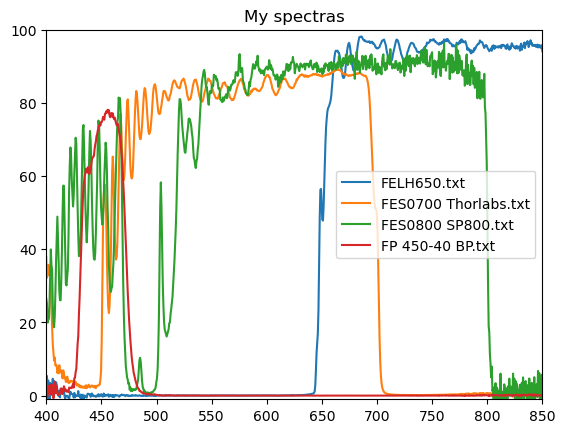

In [5]:

plt.figure()
plt.title('My spectras')
for dpos,d in enumerate(datas):
    plt.plot( d[:,0], d[:,4] , label= final_file_list[dpos] )
plt.legend()
plt.ylim(-1,100)
plt.xlim(400,850)
    

Here thanks to numpy we could open our data pretty easily, however we passed some file description with skip_header. It is obviously possible to open files with Python built-in syntax.

Generally ones open a file with the function ***open()***, which returns a file object that can be enumerated. You can view it as a bookmark. However if the program has to stop the file will not be closed. To avoid this, it is usual to add the **with** syntax, which will automatically close the file once it has finished.

Once we have a file object, we can read it whole with the **.read()** method, a finite number of characters can be given to read.

In [6]:

def print_txt_file_py( file ):
    """ open a txt file with python and print each line """
    with open(file,'r') as f:
        print( f.read() )
            
print_txt_file_py( data_folder + folder2 + final_file_list[0] )
                     


FELH650
Integration time [ms]:   2.000
Averaging Nr. [scans]: 30
Smoothing Nr. [pixels]: 0
Data measured with spectrometer [name]: 1601059U1
Wave   ;Sample   ;Dark     ;Reference;Transmittance
[nm]   ;[counts] ;[counts] ;[counts] ;[%]

 200.09;   -7.297;    2.274;    3.810;-622.96784
 200.69;    4.584;    0.920;   25.480;14.92132
 201.30;    5.949;    2.380;   16.345;25.55427
 201.90;    1.389;   -2.748;   24.876;14.97746
 202.50;  -10.446;    1.610;   22.238;-58.44416
 203.10;    0.510;   -1.749;   15.267;13.27597
 203.71;    2.048;    0.350;   18.809; 9.19638
 204.31;    2.959;   -5.883;   18.469;36.31273
 204.91;    0.677;   -2.485;   24.497;11.71940
 205.51;   -1.225;   -5.684;   22.084;16.05939
 206.12;    2.603;   -3.652;   19.579;26.92621
 206.72;   -2.314;    1.514;   19.514;-21.26322
 207.32;    3.021;   -0.685;   16.264;21.86295
 207.92;    0.510;   -1.285;   20.797; 8.13090
 208.53;    1.520;   -2.218;   30.910;11.28364
 209.13;   -1.512;   -0.183;   28.607;-4.61858
 209.73;

Here we only open the first file of our file list. You can notice that we used the **open()** function with the argument **'r'**, for reading. To write a file you may use **'w'** and **f.write()**. 

Here **f.read()** read the whole file at once. However we tycally want to distinguish the header from the rest. 

A file can be read line by line in two ways :

In [8]:

def open_txt_file_py( file, n_line_header = 0, delimiter=';' ):
    """ open a txt file with python and return header and data string """
    with open(file,'r') as f:
        header = []
        for i in range(0,n_line_header):
            header.append( f.readline() )

        data_str = []
        for line in f:
            data_str.append( line.split(delimiter) )
        
    return header, data_str
        
            
head,data = open_txt_file_py( data_folder + folder2 + final_file_list[0] , n_line_header=8) #opening the first file
print('Header :')
print(head)
print('First data string :')
print( data[0] )

Header :
['FELH650\n', 'Integration time [ms]:   2.000\n', 'Averaging Nr. [scans]: 30\n', 'Smoothing Nr. [pixels]: 0\n', 'Data measured with spectrometer [name]: 1601059U1\n', 'Wave   ;Sample   ;Dark     ;Reference;Transmittance\n', '[nm]   ;[counts] ;[counts] ;[counts] ;[%]\n', '\n']
First data string :
[' 200.09', '   -7.297', '    2.274', '    3.810', '-622.96784\n']


We can either use **f.readline()** to read each line, or use f as if it was an enumerator with **for line in f**.  \
The **.split()** method allow to separate the string of each line based on a delimiter. Here the delimiter is **;**. 

We can notice when looking at the variables head and data that the **\n** newline separator is also read from the file. We can remove it with **strip**. Note that converting a string to and integer or float will also remove it :

In [9]:
head,data = open_txt_file_py( data_folder + folder2 + final_file_list[0] , n_line_header=8)
head = [hh.strip('\n') for hh in head]  #removing \n from header text

if data[-1] == ['\n']: #a file may end in a final newline, without any number, we remove it if it is the case.
    data.pop()
data = [ [float(num_str) for num_str in dataline] for dataline in data]  #converting each single data string to a number

print('Header :')
for hh in head:
    print(hh)
    
print('Data :')
for dataline in data:
    print( dataline )

Header :
FELH650
Integration time [ms]:   2.000
Averaging Nr. [scans]: 30
Smoothing Nr. [pixels]: 0
Data measured with spectrometer [name]: 1601059U1
Wave   ;Sample   ;Dark     ;Reference;Transmittance
[nm]   ;[counts] ;[counts] ;[counts] ;[%]

Data :
[200.09, -7.297, 2.274, 3.81, -622.96784]
[200.69, 4.584, 0.92, 25.48, 14.92132]
[201.3, 5.949, 2.38, 16.345, 25.55427]
[201.9, 1.389, -2.748, 24.876, 14.97746]
[202.5, -10.446, 1.61, 22.238, -58.44416]
[203.1, 0.51, -1.749, 15.267, 13.27597]
[203.71, 2.048, 0.35, 18.809, 9.19638]
[204.31, 2.959, -5.883, 18.469, 36.31273]
[204.91, 0.677, -2.485, 24.497, 11.7194]
[205.51, -1.225, -5.684, 22.084, 16.05939]
[206.12, 2.603, -3.652, 19.579, 26.92621]
[206.72, -2.314, 1.514, 19.514, -21.26322]
[207.32, 3.021, -0.685, 16.264, 21.86295]
[207.92, 0.51, -1.285, 20.797, 8.1309]
[208.53, 1.52, -2.218, 30.91, 11.28364]
[209.13, -1.512, -0.183, 28.607, -4.61858]
[209.73, 11.248, 1.222, 35.521, 29.23069]
[210.33, -0.092, -1.444, 33.286, 3.89308]
[210.94

We now have a comprehensive header and data list, extracted from a .txt file, without using external libraries ! However using numpy can be both more readable, but also faster. As a side note, you can compare the speed of two processes with the **time** module :

In [10]:

import time
from time import perf_counter


def open_txt_file_py( file, n_line_header = 0, delimiter=';' ):
    """ open a txt file with python and return header, and data as numbers. """
    with open(file,'r') as f:
        header = []
        for i in range(0,n_line_header):
            header.append( f.readline().strip('\n') )

        data = []
        for line in f:
            data.append( [ float(l) for l in line.split(delimiter) if l!='\n' ] )

    return header, data

t0 = time.perf_counter() #get the clock time when this line is executed
head,data = open_txt_file_py( data_folder + folder2 + final_file_list[0] , n_line_header=8)
dt = time.perf_counter() - t0  #time spent between this line and the line defining t0.
print('Self made open txt function took' , round( dt, 5 ) , 's')

t0 = time.perf_counter() 
data2 = open_txt_file_np
dt = time.perf_counter() - t0  
print('Numpy open txt function took' , round( dt, 5 ) , 's')



Self made open txt function took 0.01259 s
Numpy open txt function took 0.00015 s


As you can see, numpy functions are much faster than our self-made function. This is partlybecause numpy use C-compiled code, but also because its code has been optimized many times. 

To go further, if you ever need to open .csv files, you can look up the ***Open_csv_data.py*** file that is provided in the course documents. As of now to spare some time we will go to the next step.

## Fitting data

A usual goal in data processing is to adjust experimental data to a theoretical curve. Fitting of the data can be done with any formula via the scipy **optimize** function. 

**Try to choose a typical function you would like to fit**. If you are out of idea, you can pick either a gaussian, an exponential, a polynom, a trigonometric function, a sum of decreasing exponentials ... In the next step, I will show how to fit a decreasing exponential function. As you test this program, try to build your own fit library, that can fit the curve that you have chosen !



In [28]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize


First we will define the general function we want to fit. It has a support **X**, and parameters contained in an array **p** : 

In [29]:
def dec_exp(p,X):
    # Return decreasing exp on X. p is [Sum (amp), x, sx, offset]
    y = p[0]*np.exp(-X / p[1] ) + p[-1]
    return y

Here **p** contains the amplitude, the time scale and the offset of the function. Think about which parameter you need for your fit. If you have chosen a second order polynom for example, it will have three elements.

Scipy **optimize** function will try to minimize a difference array between our fit and data **Y**. We will provide this array with a matching function :

In [30]:
def dec_exp_diff(p,X,Y):
    return dec_exp(p,X) - Y

The order of the parameters will be important for **optimize**, so place **p** first ! Then we will define a function that implicitely call **optimize** :

In [31]:
def dec_exp_fit(Y, X, p0):
    p = optimize.leastsq(dec_exp_diff, p0 , args=(X,Y), xtol = 1e-4)
    return p[0] #modified  14 Ap.2020

**Optimize** needs an initial parameter **p0**. You can either put data manually or find smart ways to define this automatically. In this case you would set p0 default value as None, and call your automatic guess function in this case.

Finally, we will simulate the Y data, add noise to it, and check if the ***dec_exp_fit*** function correctly finds the input parameter :

In [43]:
def dec_exp_test():
    global X,Y,Ynoise #this allows to access this data outside of the function. (don't overuse this !)
    
    X = np.arange(0,200)
    pini = [500, 34.5, 50]
    Y = dec_exp(pini,X)

    p0 = [450, 30, 80]
    pfit = dec_exp_fit(Y=Y,X=X,p0=p0)
    print('\nTesting Exp fit without noise')    
    
    Ynoise  = np.random.poisson( Y )
    
    print('\n')

    
    pfit_noise = dec_exp_fit(Y=Ynoise,X=X,p0=p0)
    print('Testing Exp fit with Poisson noise')
    print('Real p: '+str(pini))
    print('Found p: ' + str(pfit))
    print('Found p with noise: ' + str(pfit_noise))
    
    plt.figure()
    plt.plot(X,Y,label='raw data', color='blue')
    plt.plot(X,Ynoise, label='noised data', color='red')
    plt.plot(X, dec_exp(pfit,X), label='raw fit', linestyle=':', color='blue')
    plt.plot(X, dec_exp(pfit,X), label='noised fit', linestyle=':', color='red')
    plt.legend()
    
    return None


Testing Exp fit without noise


Testing Exp fit with Poisson noise
Real p: [500, 34.5, 50]
Found p: [499.99999968  34.49999998  50.00000014]
Found p with noise: [503.08486472  33.95213284  51.01674644]


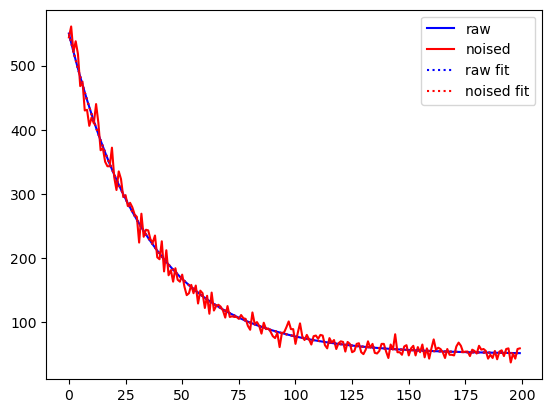

In [44]:
dec_exp_test()


Testing Exp fit without noise


Testing Exp fit with Poisson noise
Real p: [500, 34.5, 50]
Found p: [499.99999968  34.49999998  50.00000014]
Found p with noise: [483.8712139   35.5421625   48.74934552]


(200.0, 300.0)

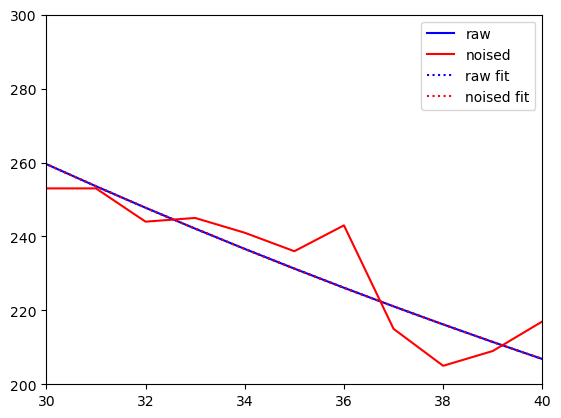

In [46]:
dec_exp_test()
plt.xlim(30,40)
plt.ylim(200,300)

Now that you've seen it all, try to build your own fitting function ! Good luck :)

As a bonus, here is one way to add an automatic p0 to your code :

In [60]:
def dec_exp_guess(Y,X):
    """try to guess parameter of Y = A*Exp( -X/T ) + offset """
    #we take min as offset, max near X=0 as amplitude, and a median of the correct tho for Y = A*Exp( -X/T ) + offset
    Y[Y<0] = 0
    offset = np.min(Y)
        
    amp = Y[ np.argmin( X ) ] - offset #works if X close to 0 in the data
    
    not_extrema = (Y!=offset)*(Y!=amp+offset)# we avoid 0 division by ignoring extremas.
    exp_part = np.log( amp / ( Y[not_extrema]-offset) ) 
    tho_at_each_X = X[not_extrema] /np.log( exp_part ) 
    
    
    tho = np.nanmedian( tho_at_each_X ) / 2
        
    return [amp,tho,offset]


X = np.arange(0,200)
pini = [500, 34.5, 50]
Y = dec_exp(pini,X)

pguess = dec_exp_guess( Y , X )

print( 'Guessed parameter is' , pguess  )

Guessed parameter is [498.43717957064104, 47.902910152555975, 51.56282042935898]


In [61]:
def dec_exp_fit(Y, X, p0=None, ):
    if p0 is None:
        p0 = dec_exp_guess(Y,X=X)# p is [Sum (amp), x, sx, offset]

    p = optimize.leastsq(dec_exp_diff, p0 , args=(X,Y,fixed_offset), xtol = 1e-4)
    return p[0] #modified  14 Ap.2020